# Portfolio Optimization

In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import quandl

In [20]:
start = pd.to_datetime('2012-01-01')
end = pd.to_datetime('2017-01-01')

In [21]:
aapl = quandl.get('WIKI/AAPL.11',start_date=start,end_date=end)
cisco = quandl.get('WIKI/CSCO.11',start_date=start,end_date=end)
ibm = quandl.get('WIKI/IBM.11',start_date=start,end_date=end)
amzn = quandl.get('WIKI/AMZN.11',start_date=start,end_date=end)

In [22]:
stocks = pd.concat([aapl,cisco,ibm,amzn],axis=1)
stocks.columns = ['aapl','cisco','ibm','amzn']

In [23]:
stocks.head()

,aapl,cisco,ibm,amzn
Date,,,,
2012-01-03,52.848787,15.617341,157.578371,179.03
2012-01-04,53.132802,15.919125,156.935540,177.51
2012-01-05,53.722681,15.860445,156.191208,177.61
2012-01-06,54.284287,15.801764,154.398046,182.61
2012-01-09,54.198183,15.902359,153.594506,178.56


In [24]:
stocks.pct_change(1).mean()

aapl     0.000750
cisco    0.000599
ibm      0.000081
amzn     0.001328
dtype: float64

In [25]:
stocks.pct_change(1).corr()

,aapl,cisco,ibm,amzn
aapl,1.000000,0.301990,0.297498,0.235487
cisco,0.301990,1.000000,0.424672,0.284470
ibm,0.297498,0.424672,1.000000,0.258492
amzn,0.235487,0.284470,0.258492,1.000000


In [26]:
stocks.pct_change(1).head()

,aapl,cisco,ibm,amzn
Date,,,,
2012-01-03,NaN,NaN,NaN,NaN
2012-01-04,0.005374,0.019324,-0.004079,-0.008490
2012-01-05,0.011102,-0.003686,-0.004743,0.000563
2012-01-06,0.010454,-0.003700,-0.011481,0.028152
2012-01-09,-0.001586,0.006366,-0.005204,-0.022178


In [27]:
log_returns = np.log(stocks/stocks.shift(1))
log_returns.head()

,aapl,cisco,ibm,amzn
Date,,,,
2012-01-03,NaN,NaN,NaN,NaN
2012-01-04,0.005360,0.019139,-0.004088,-0.008526
2012-01-05,0.011041,-0.003693,-0.004754,0.000563
2012-01-06,0.010400,-0.003707,-0.011547,0.027763
2012-01-09,-0.001587,0.006346,-0.005218,-0.022428


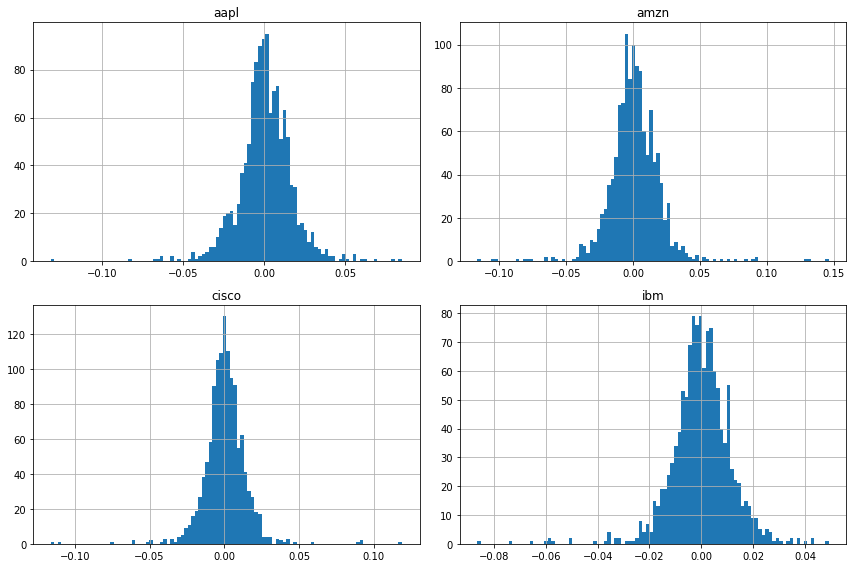

In [28]:
log_returns.hist(bins=100, figsize=(12,8))
plt.tight_layout()

In [29]:
log_returns.mean()

aapl     0.000614
cisco    0.000497
ibm      0.000011
amzn     0.001139
dtype: float64

In [30]:
# covariance times annual business days
log_returns.cov() * 252

,aapl,cisco,ibm,amzn
aapl,0.068326,0.017854,0.014464,0.018986
cisco,0.017854,0.051381,0.018029,0.019956
ibm,0.014464,0.018029,0.035203,0.014939
amzn,0.018986,0.019956,0.014939,0.094470


In [31]:
np.random.seed(101)

print(stocks.columns)

weights = np.array(np.random.random(4))

print('Random weights:')
print(weights)

print('Rebalance')
weights = weights/np.sum(weights)
print(weights)

# expected return
print('Expected Portfolio Return')
exp_return = np.sum((log_returns.mean() * weights) * 252)
print(exp_return)

# expected volatility
print('Expected Volatility')
exp_volat = np.sqrt(np.dot(weights.T,np.dot(log_returns.cov()*252,weights)))
print(exp_volat)

# sharpe ratio
print('Sharpe Ratio')
sr = exp_return/exp_volat
print(sr)

Index(['aapl', 'cisco', 'ibm', 'amzn'], dtype='object')
Random weights:
[ 0.51639863  0.57066759  0.02847423  0.17152166]
Rebalance
[ 0.40122278  0.44338777  0.02212343  0.13326603]
Expected Portfolio Return
0.155992720496
Expected Volatility
0.185026495659
Sharpe Ratio
0.843083148393


In [32]:
np.random.seed(101)

num_ports = 5000
all_weights = np.zeros((num_ports,len(stocks.columns)))
ret_arr = np.zeros(num_ports)
volat_arr = np.zeros(num_ports)
sharpe_arr = np.zeros(num_ports)

for ind in range(num_ports):
    
    # weights
    weights = np.array(np.random.random(4))
    weights = weights/np.sum(weights)
    
    # save weights
    all_weights[ind,:] = weights

    # expected return
    ret_arr[ind] = np.sum((log_returns.mean() * weights) * 252)

    # expected volatility
    volat_arr[ind] = np.sqrt(np.dot(weights.T,np.dot(log_returns.cov()*252,weights)))

    # sharpe ratio
    sharpe_arr[ind] = ret_arr[ind]/volat_arr[ind]


In [33]:
sharpe_arr.max()

1.0303260551271305

In [34]:
sharpe_arr.argmax()

1420

In [35]:
all_weights[1420]

array([ 0.26188068,  0.20759516,  0.00110226,  0.5294219 ])

In [36]:
max_sr_ret = ret_arr[sharpe_arr.argmax()]
max_sr_volat = volat_arr[sharpe_arr.argmax()]

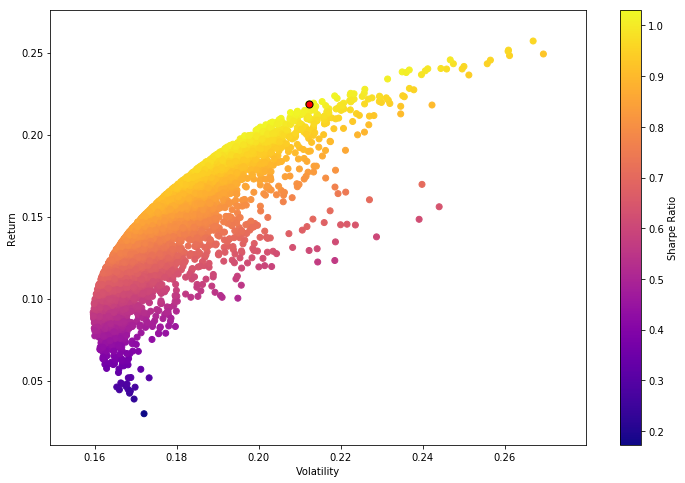

In [37]:
plt.figure(figsize=(12,8))
plt.scatter(volat_arr,ret_arr,c=sharpe_arr,cmap='plasma')
plt.colorbar(label='Sharpe Ratio')
plt.xlabel('Volatility')
plt.ylabel('Return')

plt.scatter(max_sr_volat,max_sr_ret,c='red',s=50,edgecolors='black')

In [38]:
def get_ret_vol_sr(weights):
    weights = np.array(weights)
    ret = np.sum(log_returns.mean() * weights) * 252
    vol = np.sqrt(np.dot(weights.T,np.dot(log_returns.cov()*252,weights)))
    sr = ret/vol
    return np.array([ret,vol,sr])

In [39]:
from scipy.optimize import minimize

In [40]:
def neg_sharpe(weights):
    return get_ret_vol_sr(weights)[2] * -1

In [41]:
def check_sum(weights):
    ''' Return 0 if the sum of weights is 1'''
    return np.sum(weights) - 1

In [42]:
cons = ({'type':'eq','fun':check_sum})

In [43]:
bounds = ((0,1),(0,1),(0,1),(0,1))

In [44]:
init_guess = [0.25,0.25,0.25,0.25]

In [45]:
opt_results = minimize(neg_sharpe,init_guess,method='SLSQP',bounds=bounds,constraints=cons)

In [46]:
opt_results

     fun: -1.0307168703349403
     jac: array([  5.64306974e-05,   4.18424606e-05,   3.39921713e-01,
        -4.45097685e-05])
 message: 'Optimization terminated successfully.'
    nfev: 42
     nit: 7
    njev: 7
  status: 0
 success: True
       x: array([ 0.26628977,  0.20418982,  0.        ,  0.5295204 ])

In [47]:
opt_results.x

array([ 0.26628977,  0.20418982,  0.        ,  0.5295204 ])

In [48]:
get_ret_vol_sr(opt_results.x)

array([ 0.21885915,  0.21233683,  1.03071687])

## Efficient Frontier

In [49]:
frontier_y = np.linspace(0,0.3,100)

In [50]:
def minimize_volatility(weights):
    return get_ret_vol_sr(weights)[1]

In [51]:
frontier_volatility = []

for possible_return in frontier_y:
    cons = ({'type':'eq','fun':check_sum,
             'type':'eq','fun':lambda w: get_ret_vol_sr(w)[0] - possible_return})
    
    result = minimize(minimize_volatility,init_guess,method='SLSQP',bounds=bounds,constraints=cons)
    
    frontier_volatility.append(result['fun'])

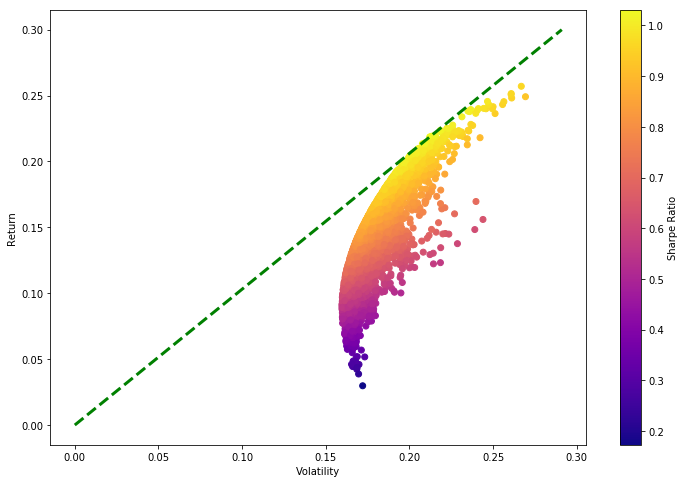

In [53]:
plt.figure(figsize=(12,8))
plt.scatter(volat_arr,ret_arr,c=sharpe_arr,cmap='plasma')
plt.colorbar(label='Sharpe Ratio')
plt.xlabel('Volatility')
plt.ylabel('Return')

plt.plot(frontier_volatility,frontier_y,'g--',linewidth=3)